In [ ]:
# %pip install numpy
# %pip install matplotlib
# %pip install scipy

# Example 1. Solving a First-Order ODE: Expontial Decay

To begin with, we wish to solve a first-order ODE, taking the example of the exponential decay of a radioactive sample. The quantity subject to exponential decay $N$ (with arbitrary units) has inital value $N_0$ at time $t=0$ and behaves according to the following differential equation at $t>0$:

$$
\begin{equation}
    \frac{dN}{dt}=-\lambda N
    \label{eq: exp decay} \tag{1}
\end{equation}
$$

with $\lambda$ the decay constant, related to the half-life by $t_{1/2} = \ln{(2)}\text{/}\lambda$.

The solution to equation $\eqref{eq: exp decay}$ can be derived analytically in a straight-forward way by separation of varibles and is given by,

$$
\begin{equation}
    N(t)=N_0 e^{-\lambda t}
    \label{eq: exp decay solution} \tag{2}
\end{equation}
$$


We now wish to solve Equation \eqref{eq: exp decay} by two differnt means, which are to be compared: 
1) odeint library from SciPy, and
2) sympy symbolic mathematics library,

where the former solves ODEs numerically and the latter gives an exact symbolic solution.


## a) with SciPy

In order to comapare the two means, we measure the time taken to solve Equation $\eqref{eq: exp decay}$.

In [22]:
import time

start_time = time.time()

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define a function that returns derivative values at requested y and t values
def FODE(N,t):
    l=0.3
    dNdt = -l*N
    return dNdt

# Initial condition
N_0 = 5

# Time points
t_values = np.linspace(0,20)

# Solve the ODE where odeint requires the model function, the initial conditions of the differential states and the time values at which the solution should be given
N_values = odeint(FODE, N_0, t_values)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time to solve the ODE: {elapsed_time} seconds")

Elapsed time to solve the ODE: 0.001993417739868164 seconds


### Plotting the solution

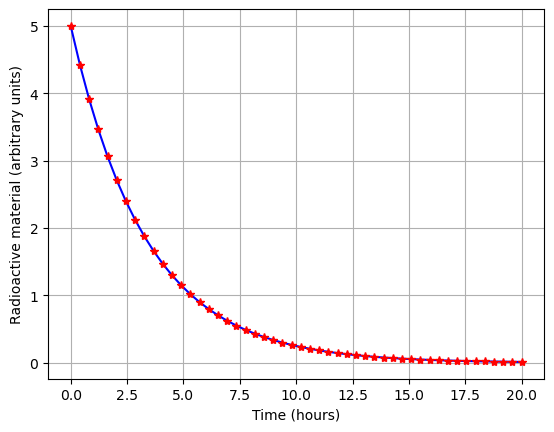

In [24]:
plt.plot(t_values, N_values, 'b')
plt.plot(t_values, N_values, 'r*')
plt.xlabel('Time (hours)')
plt.ylabel('Radioactive material (arbitrary units)')
plt.grid()
plt.show()

## b) with SymPy

SymPy evaluates the solution to an equation by:
1) defining the function it needs to solve for [with sym.Function()], 
2) defining all symbols representing the variables in the equation [with sym.symbols()], and
3) defining the equation to be solved [with symb.Eq(), where in the brackets the LHS is followed by a comma and the RHS].

Finally, the equation is solved by using sym.dsolve(), with the equation and the function are to be specified in the brackets.

In [42]:
start_time = time.time()

import sympy as sym

# Define the variable we want to solve for
N = sym.Function('N', real=True) 

# Define all symbols used in the problem: t for time, l for lambda, the decay constant and y0 for the ...
t, l = sym.symbols('t lambda', real=True) # Notice formatting without commas in RHS

# Define the equation to solve
expr_decay = sym.Eq(N(t).diff(t), -l*N(t))

# Solve the equation
sol_decay = sym.dsolve(expr_decay, N(t))


end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time to solve the ODE: {elapsed_time} seconds")

Elapsed time to solve the ODE: 0.08581829071044922 seconds


In [43]:
# Print the solution in LaTeX format
sol_decay

Eq(N(t), C1*exp(-lambda*t))

As expected, the solution with SymPy is a symbolic expression, which could be more useful if you need an exact formula or if you want to perform further symbolic manipulations.

### Specifying the initial conditions, e.g. $N_0=5$

To solve for the constant $C_1$, we can use an inbuilt SymPy function wherein you call initial conditions in the sym.dsolve() function as follows:

ics_decay = {N(0): $5$}

for a single initial condition (we shall see the case of two initial conditions in Example 2. Note that the semi-colon is used to specify the value instead of an equal sign.

In [29]:
ics_decay = {N(0): 5}
sol_decay_2 = sym.dsolve(expr_decay, N(t), ics=ics_decay)
sol_decay_2

Eq(N(t), 5*exp(-lambda*t))

In [30]:
# Assuming 𝜆=0.3, 
sol_decay_complete = sol_decay_2.subs({l:0.3})
sol_decay_complete

Eq(N(t), 5*exp(-0.3*t))

### Plotting the symbolic function

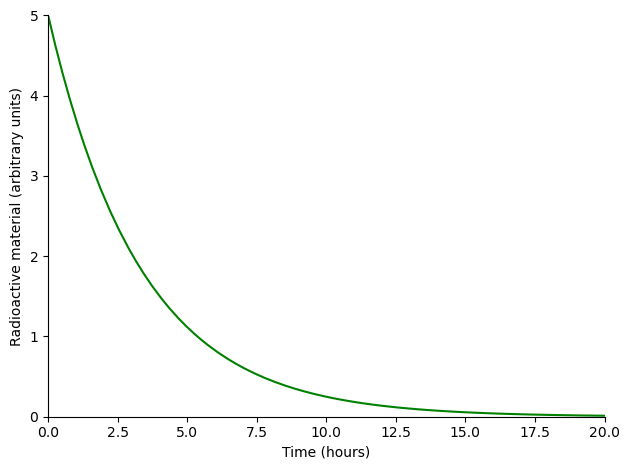

In [32]:
sym.plot(sol_decay_complete.rhs, (t,0,20), line_color='g', xlabel='Time (hours)', ylabel='Radioactive material (arbitrary units)', xlim=(0,20), ylim=(0,5), axis_center=(0,0), grid=True, show=True)

# Example 2. Solving a Second-Order ODE: Spring

This section will work us through a second order ODE, introducing syntax and solving the numerical coefficients in the analytical solution using boundary conditions. 

First lets imagine the second order ODE:

$$mx''(t) + bx'(t) + kx(t) = F(t),$$

which you may recognise as a spring equation with a driving force $F(t)$. For the sake of simplicity, we will assume there is no driving force behind this spring and can therefore set the RHS to zero.

This then reduces to 
$$mx''(t) + bx'(t) + kx(t) = 0,$$

where we can see that each term should be a force. $m$ is mass, $b$ is a damping coefficient, and $k$ is the spring constant. 

Since this is a moderately simple ODE, we can solve this using an analytical approach by hand: 
$$x(t) = e^{\frac{\gamma}{2}t}[Ae^{\omega t}+Be^{-\omega t}]$$

where the first exponential term comes from the decay of the system due to damping, and the second term is from the oscillations themselves. Here $A$ and $B$ are constants, and $\omega^2 = \omega_0^2-\frac{\gamma^2}{4}.$ Here we also take $\omega_0$ to be the natural frequency of the oscillation if there were no damping, this is defined as $\omega_0 = \sqrt{\frac{k}{m}}.$ The last term is a damping coefficient and is related to $b$ by $\gamma = \frac{b}{m}.$

Now lets solve the same system in SymPy.


## a) spring without damping

The simplest way to do this is with just two terms. Let's ignore friction, like all good physicists must. $b=0$

In [33]:
# Define a function, in this case we use x which is expressed above as x(t)
x = sym.Function('x')(t)

# Define the symbols relevant to this problem: t for time, m for mass, and k for spring constant
t, m, k = sym.symbols('t m k') 

# Now we can enter our equation into a variable using sym.Eq()
spring1 = sym.Eq(m * x.diff(t, 2) + k * x, 0)

# And print in LaTeX format by calling spring1
spring1

Eq(k*x(t), 0)

Now we can solve using the sym.dsolve function, depending on how many cores you are using this may take a minute

In [6]:
springsol1 = sym.dsolve(spring1)
springsol1

Eq(x(t), C1*exp(-t*sqrt(-k/m)) + C2*exp(t*sqrt(-k/m)))

Which if you care to notice, is the exact same solution without a damping term as described above. 

## b) with damping

Now lets add the damping term and see what happens: 

In [37]:
# Define b, the damping factor
b = sym.symbols('b')

# Now we can enter our equation into a variable using sym.Eq()
spring2 = sym.Eq(m * x.diff(t, 2) + b * x.diff(t,1) + k * x, 0)

# And print in LaTeX format by calling spring2
spring2

Eq(b*Derivative(x(t), t) + k*x(t) + m*Derivative(x(t), (t, 2)), 0)

In [38]:
springsol2 = sym.dsolve(spring2)
springsol2

Eq(x(t), C1*exp(t*(-b + sqrt(b**2 - 4*k*m))/(2*m)) + C2*exp(-t*(b + sqrt(b**2 - 4*k*m))/(2*m)))

Which again, if we were to look really closely at the analytical solution by hand, we would find an indentical counterpart here. For the sake of clarity, lets use numbers now instead of symbols for our constants:

In [39]:
# Define numerical values
k = 0.56 # kg/s^2
m = 4.11 # kg
b = 0.1  # kg/s

spring3 = sym.Eq(m * x.diff(t, 2) + b * x.diff(t,1) + k * x, 0)
springsol3 = sym.dsolve(spring3)
springsol3

Eq(x(t), (C1*sin(0.368924169967038*t) + C2*cos(0.368924169967038*t))*exp(-0.0121654501216545*t))

Which corresponds equally well with the above solution. However this is a good example of why it is useful to leave all solutions in symbolic form, because this is ugly and numbers are for engineers. 

The last section of this is to solve for the constants $C_1$ and $C_2$. This is done similarly as in Example 1 of the exponential decay. However, here we need to initial conditions, one for $x$ and the other for its derivative. Hence, the syntax is a little strange so lets go over it:

ics={x.diff(t,1).subs(t,0): 0, x.subs(t,0): -0.1}

You first call the variable such as x.diff(t,1) which is the first order derivative.<br>
Then you call .subs(var, value), that is to say the independent variable (t here) and the value for which you set the condition.<br>
Then you follow that with : value for the value it takes at the value given in .subs()


In [41]:
# We now need to define some boundary conditions
t0, dxdt0, x0 = sym.symbols('t0 dxdt0 x0')


springsol4 = sym.dsolve(spring3, x, ics={x.diff(t,1).subs(t,t0): dxdt0, x.subs(t,0): x0})

springsol4

Eq(x(t), (x0*cos(0.368924169967038*t) + (2.055e+17*dxdt0*exp(0.0121654501216545*t0)/(-2.5e+15*sin(0.368924169967038*t0) + 7.58139169282263e+16*cos(0.368924169967038*t0)) + 7.58139169282263e+16*x0*sin(0.368924169967038*t0)/(-2.5e+15*sin(0.368924169967038*t0) + 7.58139169282263e+16*cos(0.368924169967038*t0)) + 2.5e+15*x0*cos(0.368924169967038*t0)/(-2.5e+15*sin(0.368924169967038*t0) + 7.58139169282263e+16*cos(0.368924169967038*t0)))*sin(0.368924169967038*t))*exp(-0.0121654501216545*t))

Now, if you were paying attention you will have noticed that output looks like a disgusting mess. We can try and simplify the output using sym.simplify()

This may take a minute or two to run, given the amount of spaghetti we created above

In [12]:
# Simplify expression
sym.simplify(springsol4)

Eq(x(t), (m*(-b**2*exp(t0*sqrt(b**2 - 4*k*m)/m) + b*sqrt(b**2 - 4*k*m)*exp(t0*sqrt(b**2 - 4*k*m)/m) + 2*k*m*exp(t0*sqrt(b**2 - 4*k*m)/m) + 2*k*m)*(-b**6*dxdt0*exp(t0*(b + 5*sqrt(b**2 - 4*k*m))/(2*m)) + b**5*dxdt0*sqrt(b**2 - 4*k*m)*exp(t0*(b + 5*sqrt(b**2 - 4*k*m))/(2*m)) - b**5*k*x0*exp(2*t0*sqrt(b**2 - 4*k*m)/m) + b**4*dxdt0*k*m*exp(t0*(b + 3*sqrt(b**2 - 4*k*m))/(2*m)) + 6*b**4*dxdt0*k*m*exp(t0*(b + 5*sqrt(b**2 - 4*k*m))/(2*m)) + b**4*k*x0*sqrt(b**2 - 4*k*m)*exp(2*t0*sqrt(b**2 - 4*k*m)/m) - b**3*dxdt0*k*m*sqrt(b**2 - 4*k*m)*exp(t0*(b + 3*sqrt(b**2 - 4*k*m))/(2*m)) - 4*b**3*dxdt0*k*m*sqrt(b**2 - 4*k*m)*exp(t0*(b + 5*sqrt(b**2 - 4*k*m))/(2*m)) + 5*b**3*k**2*m*x0*exp(2*t0*sqrt(b**2 - 4*k*m)/m) + b**3*k**2*m*x0*exp(t0*sqrt(b**2 - 4*k*m)/m) - 4*b**2*dxdt0*k**2*m**2*exp(t0*(b + 3*sqrt(b**2 - 4*k*m))/(2*m)) - 9*b**2*dxdt0*k**2*m**2*exp(t0*(b + 5*sqrt(b**2 - 4*k*m))/(2*m)) - 3*b**2*k**2*m*x0*sqrt(b**2 - 4*k*m)*exp(2*t0*sqrt(b**2 - 4*k*m)/m) - b**2*k**2*m*x0*sqrt(b**2 - 4*k*m)*exp(t0*sqrt(b**

Unfortunately, it is probably not going to get better than this. So lets put in some numbers to demonstrate the effectiveness of SymPy at exact analyical solutions to real problems:

In [13]:
# Define t and some constants
t = sym.symbols('t') 
k = 0.56 # kg/s^2
m = 4.11 # kg
b = 0.1  # kg/s

# Define a function, in this case we use x which is expressed above as x(t)
x = sym.Function('x')(t)

# Now we can enter our equation into a variable using sym.Eq()
spring4 = sym.Eq(m * x.diff(t, 2) + b * x.diff(t,1) + k * x, 0)

# We now need to define some boundary conditions with real numbers this time
t0, dxdt0, x0 = 0, 0, -0.1


springsol5 = sym.dsolve(spring4, x, ics={x.diff(t,1).subs(t,t0): dxdt0, x.subs(t,0): x0})

springsol5

Eq(x(t), (-0.00329754760246298*sin(0.368924169967038*t) - 0.1*cos(0.368924169967038*t))*exp(-0.0121654501216545*t))